### Instalar dependencias e importar librerias

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
# TODO: Modify so it does not download data if already in the machine
!kaggle competitions download -c home-credit-default-risk
!mkdir data
!unzip home-credit-default-risk.zip -d data/
!rm *.zip

^C
User cancelled operation
mkdir: cannot create directory ‘data’: File exists
unzip:  cannot find or open home-credit-default-risk.zip, home-credit-default-risk.zip.zip or home-credit-default-risk.zip.ZIP.
rm: cannot remove '*.zip': No such file or directory


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
pd.set_option("display.max_rows", None)

### Leer los datos

In [4]:
df = pd.read_csv("data/application_train.csv")
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Explorar los datos

Los datos tienen 122 variables en total, con variable que queremos predecir llamada "TARGET".

Dentro de ellos tenemos:
- 65 Variables Continuas
- 41 Variables Discretas
- 16 Variables Categoricas

#### Variables de Interes

Algunas variables importantes e interesantes para el analisis son:
- NAME_INCOME_TYPE -- Tipo de ingreso del cliente.
- NAME_EDUCATION_TYPE -- Tipo de educacion que el cliente alcanzo.
- NAME_FAMILY_STATUS -- Tipo de estado familiar
- NAME_HOUSING_TYPE -- Situacion de vivienda del cliente (Arrendado, vive con los padres, etc.)
- DAYS_BIRTH -- Edad del cliente (en dias) desde que aplico.
- DAYS_EMPLOYED -- Cuantos dias antes de aplicar al prestamo el cliente empezo su empleo actual.
- OCCUPATION_TYPE -- Tipo de ocupacion del cliente.
- ORGANIZATION_TYPE -- Tipo de organizacion en la que trabaja el cliente.
- CODE_GENDER -- Genero del cliente.

#### Valores Nulos

No nos interesa lo que tenga mas del 25% porciento de valores nulos en los datos, ya que platean desafios para el analisis. Sin embargo, es importante mirar que variables que presentan este problema nos parecen importantes y analizar por que faltan valores.

Por ejemplo:
La variable "OWN_CAR_AGE" puede ser interesante analizar aunque tenga un 65% de datos faltantes, ya que puede significar que si falta el dato es por que no tiene un carro.

In [5]:
# Revisar la cantidad de datos numericos/categoricos
df.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [6]:
# Mostrar un informe de cada columna
# su nombre, tipo de dato y datos no nulos.
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [7]:
# Calcular el porcentaje de valores nulos
# que hay en cada columna.
df.isnull().mean().sort_values(ascending=False) * 100

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

### Graficas 

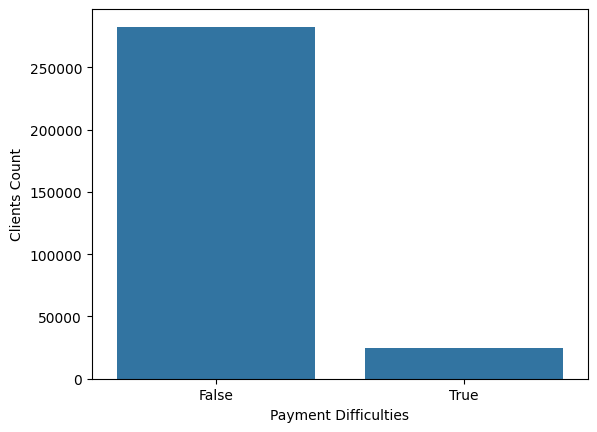

In [31]:
sns.countplot(x="TARGET", data=df)
plt.xlabel("Payment Difficulties")
plt.ylabel("Clients Count")
plt.xticks([0, 1], ["False", "True"])
plt.show()

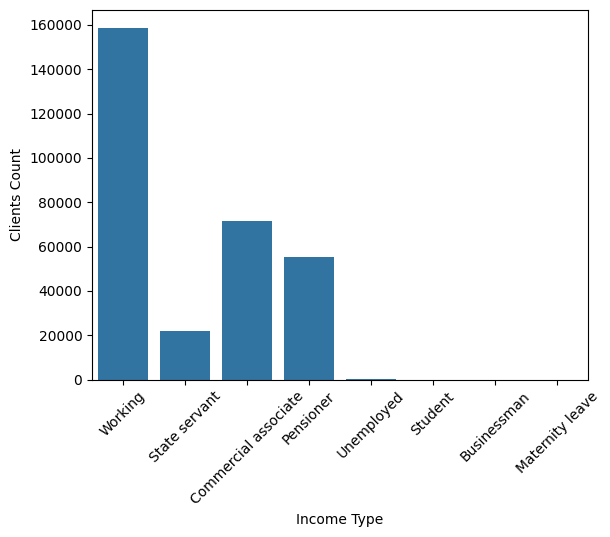

In [8]:
sns.countplot(x="NAME_INCOME_TYPE", data=df)
plt.xlabel("Income Type")
plt.ylabel("Clients Count")
plt.xticks(rotation=45)
plt.show()

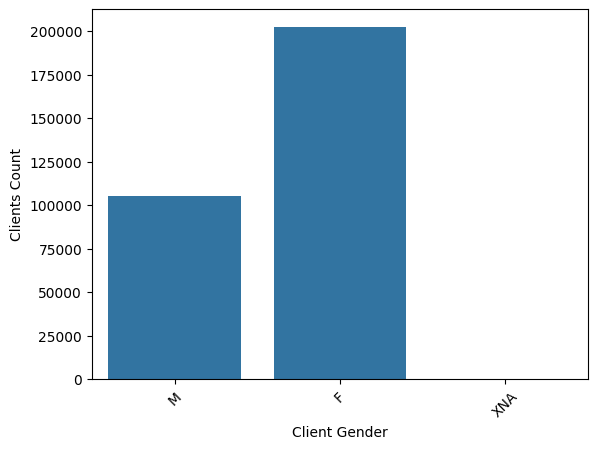

In [9]:
sns.countplot(x="CODE_GENDER", data=df)
plt.xlabel("Client Gender")
plt.ylabel("Clients Count")
plt.xticks(rotation=45)
plt.show()

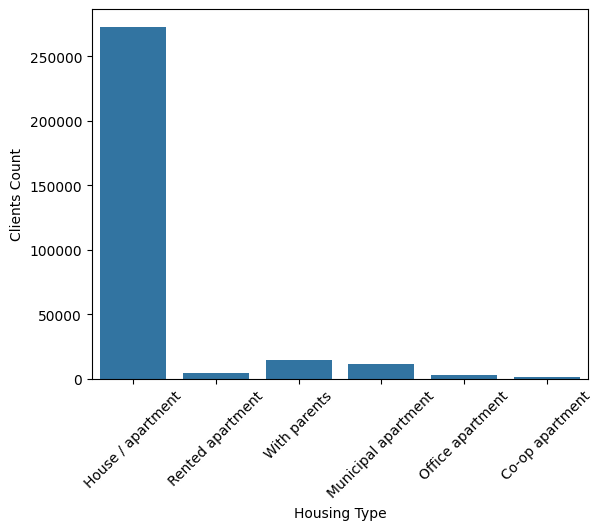

In [10]:
sns.countplot(x="NAME_HOUSING_TYPE", data=df)
plt.xlabel("Housing Type")
plt.ylabel("Clients Count")
plt.xticks(rotation=45)
plt.show()

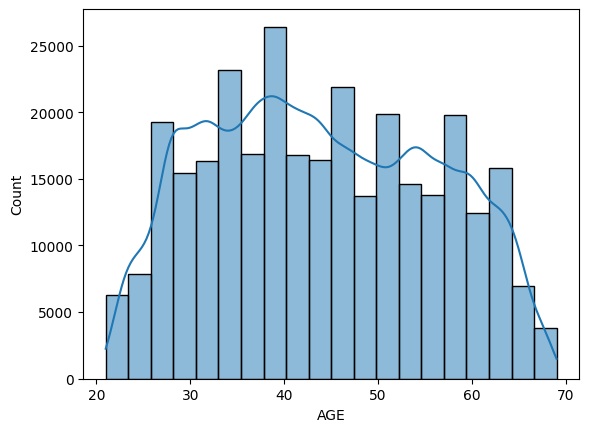

In [11]:
# Transformar la variable "DAYS_BIRTH" de dias a
# años de edad de la persona.
df_new = df.copy()
df_new["AGE"] = round(-df["DAYS_BIRTH"] / 365)
df_new["AGE"] = df_new["AGE"].astype(int)

sns.histplot(df_new["AGE"], kde=True, bins=20)
plt.show()

### Correlaciones

Con la matrix de correlacion, podemos ver que muchas de las variables numericas que se tomaron NO estan relacionadas linealmente
entre ellas.

In [24]:
total = df.isnull().sum().sort_values(ascending=False)
percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
df_null = pd.concat([total, percentage], axis=1, keys=["Total", "Percentage"])

In [25]:
threshold = 40

good_columns = df_null[df_null["Percentage"] <= threshold]
df_selected = df[good_columns.index.tolist()]

df_numeric = df_selected.select_dtypes(exclude=["object"])

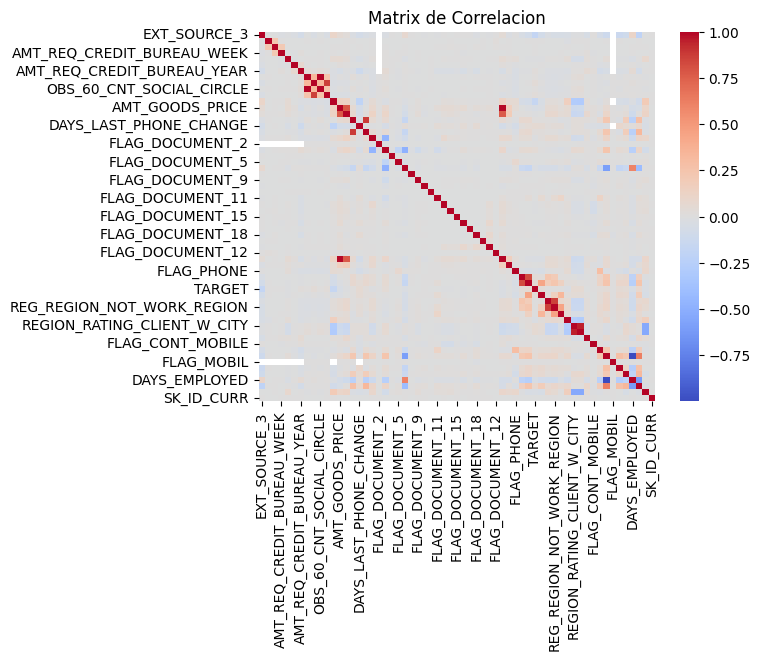

In [26]:
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Matrix de Correlacion")
plt.show()